# Jupyter Notebook Showcase

**by Ian McLoughlin (ian.mcloughlin@gmit.ie)**

This notebook demonstrates the analysis of a data set using the [Python programming language](https://www.python.org/about/gettingstarted/).

The notebook is hosted on [GitHub](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/showcase.ipynb).

You can take this interactive notebook and play around with it: [**https://goo.gl/SbYMqr**](https://goo.gl/SbYMqr).

*Note: unfortunately, Google haven't updated their packages yet so you'll have to uncomment and run the following code if you're running it on Collaboratory.*

In [1]:
#!pip install --upgrade seaborn  

***

## A bit of context

#### My objectives in this talk are to:

1. Demonstrate that programming is accessible to non-computing students.
2. Discuss the pros and cons of Graphical User Interfaces in data analytics.
3. Widen understanding of the formal sciences.

#### A few talking points

- Notebooks are useful for students of all disciplines (formal sciences, natural sciences, social sciences, engineering, etc.)
- Notebooks are documents that blend text, mathematical notation and runnable code, and can be run from a browser.
- We'll soon have our first wave of incoming students having taken Computer Science at second level.
- That might foster a discussion about what programming is - maybe it's just a skill.

***

## About the data set


![Ronald Fisher](https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG)

We'll look at the well-known [Iris data set](https://archive.ics.uci.edu/ml/datasets/iris).

It was collected by [Ronald Fisher (above)](http://www-history.mcs.st-andrews.ac.uk/Biographies/Fisher.html).

Fisher is famous for [The Design of Experiments](https://en.wikipedia.org/wiki/The_Design_of_Experiments) including the [Lady Tasting Tea problem](https://en.wikipedia.org/wiki/Lady_tasting_tea) and [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance#History) amongst other things.

***

## Load a data set

![Iris](http://www.oranchak.com/three-irises.jpg)

Using Python, we can easily load a comma separated values (CSV) file to analyse it.

In [2]:
# pandas is a Python package for investigating data sets.
import pandas as pd

# We can load a CSV file directly from a URL.
df = pd.read_csv("https://github.com/ianmcloughlin/datasets/raw/master/iris.csv")

# Have a look at the first five rows of the data set.
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


***

## Plot the data

The data set contains five variables, and so is difficult to visualise.
Luckily somebody has written a Python package called seaborn with a lovely plot suited to it.

In [3]:
# Set up our Jupyer notebook to display plots nicely.
%matplotlib inline

In [4]:
# Set the default plot size.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

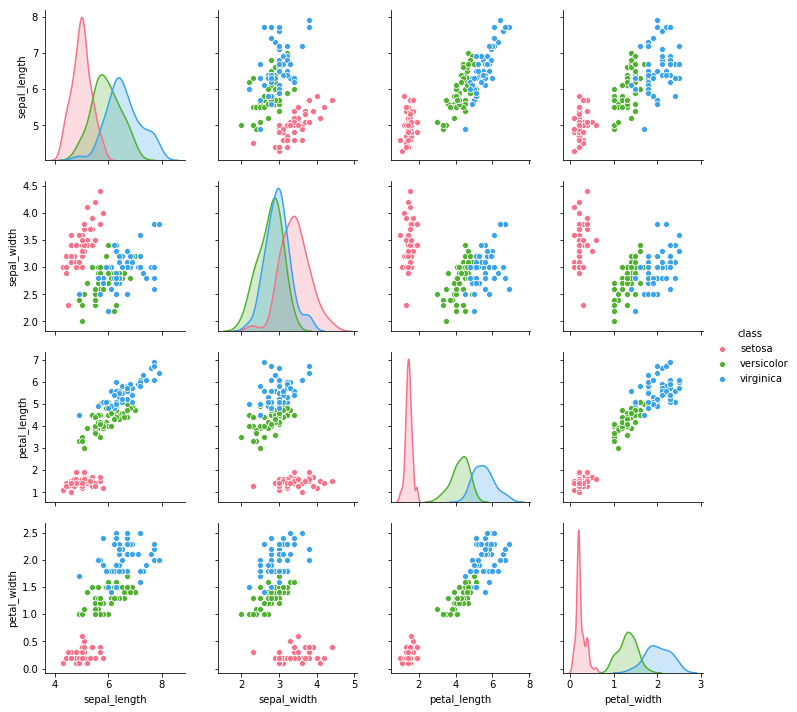

In [5]:
# seaborn is named after Rob Lowe's character in The West Wing.
import seaborn as sns

# A pair plot will create a matrix of scatter plots.
pp = sns.pairplot(df, hue="class", palette="husl")

***

## Formulate a problem

Fisher was interested in knowing whether the class could be predicted from the other variables.

$$f(sl, sw, pl, pw) = class$$

Can we figure out a good $f$ from the data set?

***

## Try a simpler problem

The setosa class looks quite a bit different to the other two.

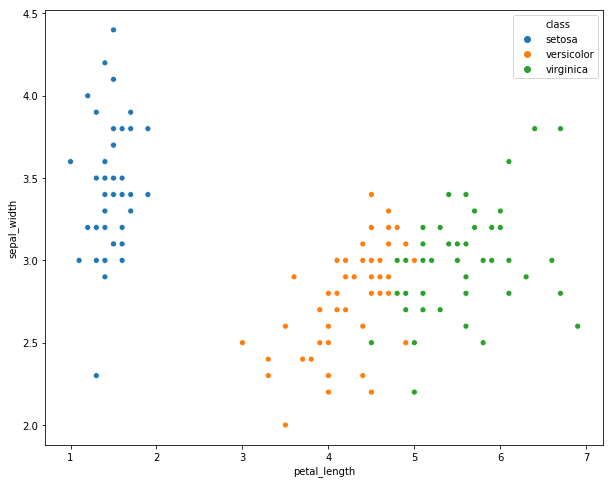

In [6]:
# Let's single out two of the numeric variables.
sns.scatterplot(x="petal_length", y="sepal_width", hue="class", data=df)

C:\Users\mclou\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


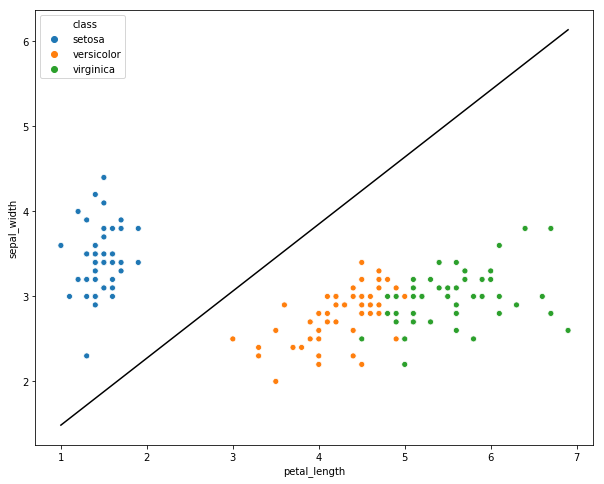

In [7]:
# Adapted from https://stackoverflow.com/questions/22491359/least-squares-linear-classifier-in-matlab
# Note the code here is a little more involved, but it can likely be simplified.

# Numerical package for Python
import numpy as np

# A will have three columns: petal lengths, sepal widths and a column of 1's.
A = df[['petal_length', 'sepal_width']].values
A = np.hstack([A, np.ones([A.shape[0], 1])])

# b is a column matrix that contains a 1 eveywhere there's a setosa and -1 elsewhere.
b = (df['class'] == 'setosa').map({True: 1, False: -1})

# Find the best x in Ax=b.
x = np.linalg.lstsq(A, b)[0]

# Now we can plot the line on top of the previous plot.
sns.scatterplot(x="petal_length", y="sepal_width", hue="class", data=df)

u = np.array([min(df['petal_length']), max(df['petal_length'])])
v = -x[2]/x[1] - (x[0]/x[1])*u;
plt.plot(u, v, 'k-')

The idea is now that when you come across a new iris, you can decide whether it's a setosa or not by plotting its petal length and sepal width to see what side of the line it is on.

***

## Train a neural network

Using Python, we can get up and running with quite sophisticated concepts very quickly.

![A neuron](https://github.com/ianmcloughlin/images/raw/master/neuron.png)

For instance, we can create small neural network.

In [8]:
# For building neural networks.
import keras as kr

# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod

inputs = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

encoder = pre.LabelBinarizer()
encoder.fit(df['class'])
outputs = encoder.transform(df['class'])

# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 4.
model.add(kr.layers.Dense(units=64, activation='relu', input_dim=4))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=3, activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the neural network.
model.fit(inputs, outputs, epochs=10, batch_size=5)

Using TensorFlow backend.


Epoch 1/10
150/150 [==============================] - 1s 5ms/step - loss: 0.8309
Epoch 2/10
150/150 [==============================] - 0s 327us/step - loss: 0.6564
Epoch 3/10
150/150 [==============================] - 0s 347us/step - loss: 0.5740
Epoch 4/10
150/150 [==============================] - 0s 480us/step - loss: 0.5263 0s - loss: 0.520
Epoch 5/10
150/150 [==============================] - 0s 500us/step - loss: 0.4801
Epoch 6/10
150/150 [==============================] - 0s 493us/step - loss: 0.4451
Epoch 7/10
150/150 [==============================] - 0s 347us/step - loss: 0.4241
Epoch 8/10
150/150 [==============================] - 0s 320us/step - loss: 0.4005
Epoch 9/10
150/150 [==============================] - 0s 440us/step - loss: 0.3717
Epoch 10/10
150/150 [==============================] - 0s 340us/step - loss: 0.3715


In [9]:
# As an example, take the average values for a versicolor.
df[df['class'] == 'versicolor'].mean()

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

In [10]:
# Ask the neural network to predict what class of iris it is.
mean_versicolor = df[df['class'] == 'versicolor'].mean().values.reshape(1,4)
prediction = model.predict([mean_versicolor])
encoder.inverse_transform(prediction)[0]

'virginica'

***

## A learning opportunity

You can see that the neural network predicts that the average versicolor to be a virginica.

When something like that happens, it's a good troubleshooting/learning opportunity for students.

You can let the students come up with ideas as to why the neural network thinks those values represent a virginica:

- Maybe the neural network is not set up correctly.
- Maybe taking the average of each variable does not represent the average versicolor.

***

## Concluding remarks

- Notebooks are useful for discussing and illuminating concepts.
- Python is an easy programming language to learn.
- We've touched on numerous different disciplines today.
- The processes, algorithms and techniques that enabled the analysis come largely from the formal sciences.

***

![fin](https://github.com/ianmcloughlin/images/raw/master/fin.jpg)